# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
# Necessary Libraries 
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
# Convert raw data into pandas dataframe
data = pd.DataFrame()
data["reviews"] = reviews
data.head()

,reviews
0,✅ Trip Verified | Couldn’t book in online. Ar...
1,✅ Trip Verified | London Heathrow to Mumbai in...
2,"✅ Trip Verified | Keflavík, Iceland to London ..."
3,✅ Trip Verified | Terrible Experience with Bri...
4,✅ Trip Verified | An airline that lives in the...


In [6]:
# Convert dataset into csv
data.to_csv("BA_reviews.csv")

 The next thing that we should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [7]:
# Read the dataset
data = pd.read_csv("BA_reviews.csv")
data.head()

,Unnamed: 0,reviews
0,0,✅ Trip Verified | Couldn’t book in online. Ar...
1,1,✅ Trip Verified | London Heathrow to Mumbai in...
2,2,"✅ Trip Verified | Keflavík, Iceland to London ..."
3,3,✅ Trip Verified | Terrible Experience with Bri...
4,4,✅ Trip Verified | An airline that lives in the...


In [8]:
# Check shape of dataframe
data.shape

(1000, 2)

In [9]:
# Check information about dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   reviews     1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [10]:
# Drop Unnecessary Column
data.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [11]:
# Check the first review
data['reviews'].loc[0]

'✅ Trip Verified |  Couldn’t book in online. Arrived at check in to find we had been bumped off due to overselling. No BA staff available. Very helpful Gatwick staff got us a bus to LHR and a flight to Toulouse. Had knock in effect on our car booking and sharing as the rest of family had been able yo board original flight. Airlines should be legally stopped from selling seats twice.'

In [12]:
# Split the trip verified string
data.reviews = data.reviews.str.split('|', expand=True)[1]

In [13]:
data

,reviews
0,Couldn’t book in online. Arrived at check in...
1,London Heathrow to Mumbai in a Boeing 787-8 i...
2,"Keflavík, Iceland to London Heathrow on an A3..."
3,Terrible Experience with British Airways. I b...
4,An airline that lives in their past glory and...
...,...
995,Dublin to London. I was trying to add additio...
996,London - Pisa (Return). I fly this route ofte...
997,I was in Prague flying British Airways back ...
998,"\r\nBA34 KUL-LHR 6 Sept, return BA11 LHR-SIN-..."


In [14]:
# Function to clean text
def clean(text):
    # Remove all special characters & numbers except alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

data['clean_reviews'] = data['reviews'].apply(clean)
data.head()

,reviews,clean_reviews
0,Couldn’t book in online. Arrived at check in...,Couldn t book in online Arrived at check in t...
1,London Heathrow to Mumbai in a Boeing 787-8 i...,London Heathrow to Mumbai in a Boeing in Busi...
2,"Keflavík, Iceland to London Heathrow on an A3...",Keflav k Iceland to London Heathrow on an A i...
3,Terrible Experience with British Airways. I b...,Terrible Experience with British Airways I bo...
4,An airline that lives in their past glory and...,An airline that lives in their past glory and...


In [15]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [28]:
import nltk
nltk.download('all-corpus')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Error loading all-corpus: Package 'all-corpus' not found
[nltk_data]     in index
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [29]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [30]:
# POS Tagger Dictionary
import nltk

from nltk.corpus import wordnet
pos_dict = {'A':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    
    new_list = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            new_list.append(tuple([word, pos_dict.get(tag[0])]))
    return new_list

In [31]:
data['POS Tagged'] = data['clean_reviews'].apply(token_stop_pos)
data.head()

,reviews,clean_reviews,POS Tagged
0,Couldn’t book in online. Arrived at check in...,Couldn t book in online Arrived at check in t...,"[(book, n), (online, n), (Arrived, v), (check,..."
1,London Heathrow to Mumbai in a Boeing 787-8 i...,London Heathrow to Mumbai in a Boeing in Busi...,"[(London, n), (Heathrow, n), (Mumbai, n), (Boe..."
2,"Keflavík, Iceland to London Heathrow on an A3...",Keflav k Iceland to London Heathrow on an A i...,"[(Keflav, n), (k, n), (Iceland, n), (London, n..."
3,Terrible Experience with British Airways. I b...,Terrible Experience with British Airways I bo...,"[(Terrible, None), (Experience, n), (British, ..."
4,An airline that lives in their past glory and...,An airline that lives in their past glory and...,"[(airline, n), (lives, v), (past, None), (glor..."


In [32]:
# Obtaining the stem words – Lemmatization
lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rev = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rev = lemma_rev + " " + lemma
     else:
        lemma = lemmatizer.lemmatize(word, pos=pos)
        lemma_rev = lemma_rev + " " + lemma
    return lemma_rev

In [33]:
data['lemma_rev'] = data['POS Tagged'].apply(lemmatize)
data.head()

,reviews,clean_reviews,POS Tagged,lemma_rev
0,Couldn’t book in online. Arrived at check in...,Couldn t book in online Arrived at check in t...,"[(book, n), (online, n), (Arrived, v), (check,...",book online Arrived check find bump due over...
1,London Heathrow to Mumbai in a Boeing 787-8 i...,London Heathrow to Mumbai in a Boeing in Busi...,"[(London, n), (Heathrow, n), (Mumbai, n), (Boe...",London Heathrow Mumbai Boeing Business Class...
2,"Keflavík, Iceland to London Heathrow on an A3...",Keflav k Iceland to London Heathrow on an A i...,"[(Keflav, n), (k, n), (Iceland, n), (London, n...",Keflav k Iceland London Heathrow Business Cl...
3,Terrible Experience with British Airways. I b...,Terrible Experience with British Airways I bo...,"[(Terrible, None), (Experience, n), (British, ...",Terrible Experience British Airways book fli...
4,An airline that lives in their past glory and...,An airline that lives in their past glory and...,"[(airline, n), (lives, v), (past, None), (glor...",airline live past glory head future crisis B...


In [34]:
data['lemma_rev'][0]

'  book online Arrived check find bump due overselling BA staff available helpful Gatwick staff get us bus LHR flight Toulouse knock effect car booking sharing rest family able yo board original flight Airlines legally stop sell seat twice'

In [35]:
data['clean_reviews'][0]

' Couldn t book in online Arrived at check in to find we had been bumped off due to overselling No BA staff available Very helpful Gatwick staff got us a bus to LHR and a flight to Toulouse Had knock in effect on our car booking and sharing as the rest of family had been able yo board original flight Airlines should be legally stopped from selling seats twice '

In [36]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.2 MB/s eta 0:00:0000:01


# Sentiment Analysis using VADER

VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

In [37]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
Analyzer = SentimentIntensityAnalyzer()

In [38]:
# Function to calculate vader sentiment
def sentiment_scores(review):
    ss = Analyzer.polarity_scores(review)
    return ss['compound']

data['Sentiment'] = data['lemma_rev'].apply(sentiment_scores)

# Function to analyse the sentiment
def sentiment_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [39]:
data['Review'] = data['Sentiment'].apply(sentiment_analysis)
data.head(1)

,reviews,clean_reviews,POS Tagged,lemma_rev,Sentiment,Review
0,Couldn’t book in online. Arrived at check in...,Couldn t book in online Arrived at check in t...,"[(book, n), (online, n), (Arrived, v), (check,...",book online Arrived check find bump due over...,0.6486,Positive


In [40]:
# Check value_count on Review column
review_count = data['Review'].value_counts()
review_count

Positive    497
Negative    397
Neutral     106
Name: Review, dtype: int64

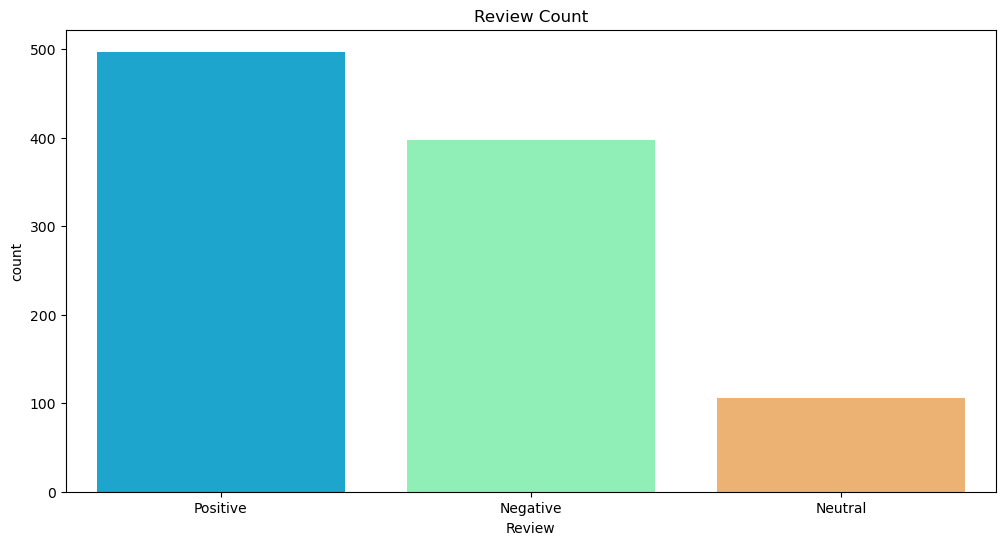

In [41]:
# Review Countplot
plt.figure(figsize=(12,6))
plt.title('Review Count');
sns.countplot(x=data['Review'], data=data, palette='rainbow');

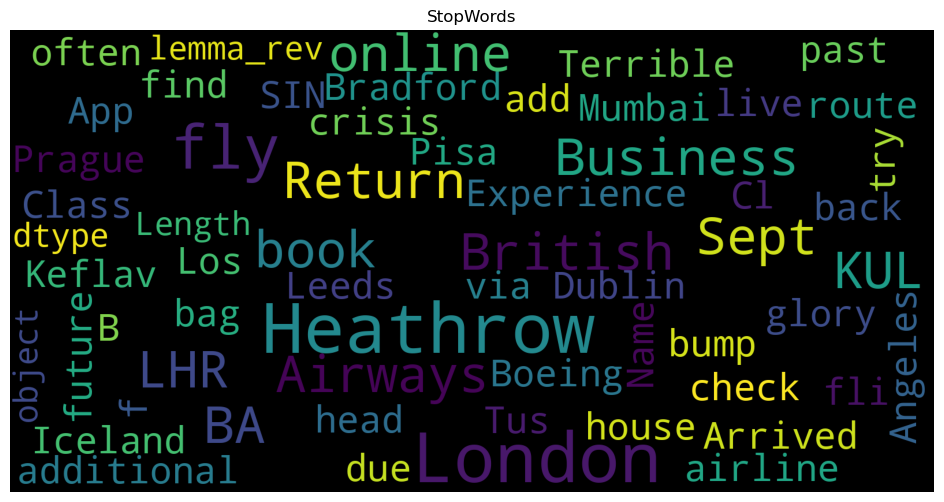

In [42]:
stopwords = set(STOPWORDS)

# Function to generate stopwords
def show_wordcloud(data):
    wordcloud = WordCloud(max_words=150,
                          background_color='black',
                          max_font_size=30,
                          stopwords=stopwords,
                          scale=4,
                          random_state=1)
    wordcloud = wordcloud.generate(str(data))
    
    plt.figure(figsize=(12,6))
    plt.axis('off')
    plt.title('StopWords')
    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(data.lemma_rev)